# COMP4318/5318 Assignment 2: Image Classification

### Group number: A161  , SID1: 550077552 , SID2: 540561135

This template notebook includes code to load the  dataset and a skeleton for the main sections that should be included in the notebook. Please stick to this struture for your submitted notebook.

Please focus on making your code clear, with appropriate variable names and whitespace. Include comments and markdown text to aid the readability of your code where relevant. See the specification and marking criteria in the associated specification to guide you when completing your implementation.

## Setup and dependencies
Please use this section to list and set up all your required libraries/dependencies and your plotting environment. 

In [5]:
import numpy as np
import os
import time
import keras_tuner
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix, precision_score, recall_score
from keras.utils import to_categorical

## 1. Data loading, exploration, and preprocessing


Code to load the dataset is provided in the following cell. Please proceed with your data exploration and preprocessing in the remainder of this section.

In [8]:
# Load the dataset training and test sets as numpy arrays
# assuming Assignment2Data folder is present in the same directory 
# as the notebook
X_train = np.load('Assignment2Data/X_train.npy')
y_train = np.load('Assignment2Data/y_train.npy')
X_test = np.load('Assignment2Data/X_test.npy')
y_test = np.load('Assignment2Data/y_test.npy')

X_train shape: (32000, 28, 28, 3)
y_train shape: (32000,)
Image shape: (28, 28, 3)
Pixel range: min = 0 , max = 255
First 5 labels: [7 3 4 2 6]


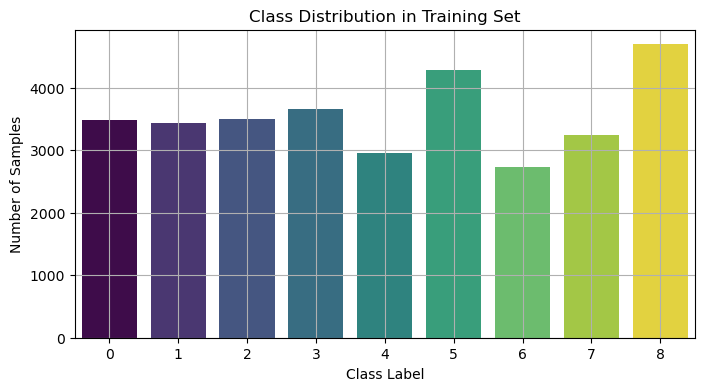

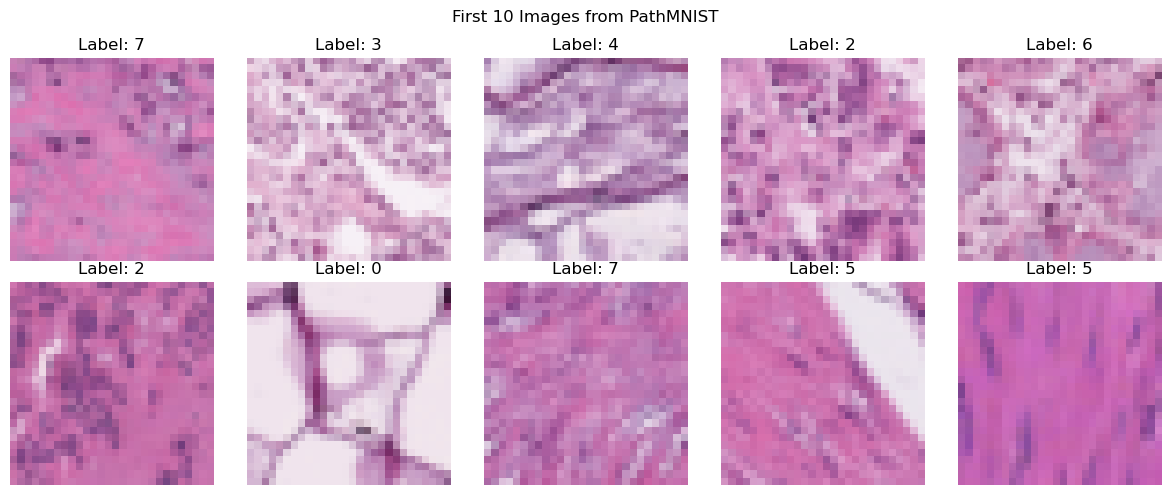

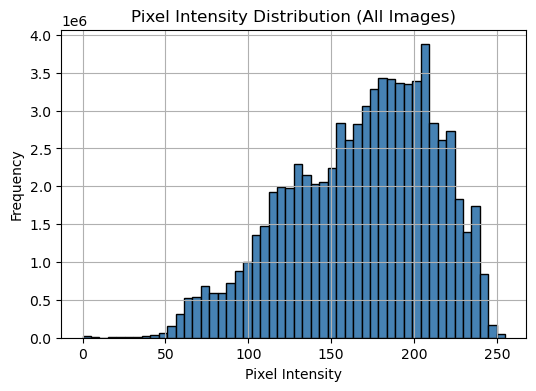

In [9]:
# Display dataset shapes
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

# Check image shape and type
print("Image shape:", X_train[0].shape)
print("Pixel range: min =", X_train.min(), ", max =", X_train.max())

# Display first 5 labels
print("First 5 labels:", y_train[:5])

# Count the number of samples per class
class_counts = pd.Series(y_train).value_counts().sort_index()

# Convert to DataFrame for seaborn plotting
df_classes = pd.DataFrame({
    'Class': class_counts.index,
    'Count': class_counts.values
})

# Class distribution in the training set
plt.figure(figsize=(8, 4))
sns.barplot(data=df_classes, x='Class', y='Count', hue='Class', dodge=False, palette='viridis')
plt.legend([], [], frameon=False)  # hide the legend
plt.title("Class Distribution in Training Set")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(True)
plt.show()


# Plot first 10 sample images with labels
plt.figure(figsize=(12, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i])
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.suptitle("First 10 Images from PathMNIST")
plt.tight_layout()
plt.show()

# pixel intensity distribution
plt.figure(figsize=(6, 4))
plt.hist(X_train.flatten(), bins=50, color='steelblue', edgecolor='black')
plt.title("Pixel Intensity Distribution (All Images)")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

### Examples of preprocessed data
Please print/display some examples of your preprocessed data here.

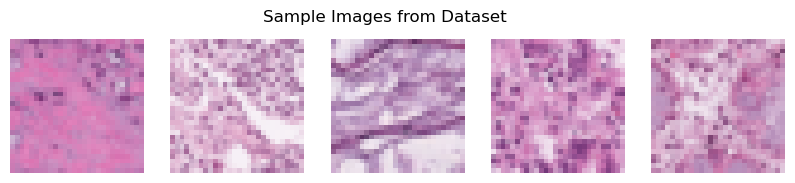

In [11]:
# Preprocessing
X = np.load('Assignment2Data/X_train.npy').reshape(-1, 28*28*3) / 255.0
y = np.load('Assignment2Data/y_train.npy')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X[i].reshape(28, 28, 3))
    axes[i].axis('off')
plt.suptitle("Sample Images from Dataset")
plt.show()

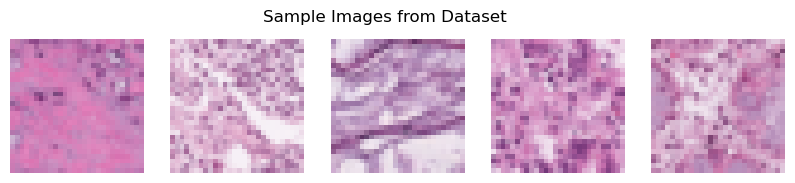

In [12]:
# Reload image-shape data
X_full = np.load('Assignment2Data/X_train.npy') / 255.0
y_full = np.load('Assignment2Data/y_train.npy')
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.9, random_state=42)
fig, axes = plt.subplots(1, 5, figsize=(10, 2))
for i in range(5):
    axes[i].imshow(X[i].reshape(28, 28, 3))
    axes[i].axis('off')
plt.suptitle("Sample Images from Dataset")
plt.show()

## 2. Algorithm design and setup

### Algorithm of choice from first six weeks of course

In [15]:
# Preprocessing
X = np.load('Assignment2Data/X_train.npy').reshape(-1, 28*28*3) / 255.0
y = np.load('Assignment2Data/y_train.npy')
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.9, random_state=42)

# Measure training time
start_time = time.time()
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)
training_time = time.time() - start_time

# Predictions
y_pred = dt_model.predict(X_valid)

# Evaluation
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

# Output results
print(f"Decision Tree Validation Accuracy: {accuracy:.4f}")
print(f"Training Time: {training_time:.2f} seconds\n")

print("Confusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Decision Tree Validation Accuracy: 0.4688
Training Time: 23.58 seconds

Confusion Matrix:
[[303  12   4   7  27   9   6   4   6]
 [ 25 301   1   8   9   1   1   2  12]
 [  5   2  94  16  21  56  10  46  78]
 [  5   1   8 162  41   9  12   8 109]
 [ 22  19   7  29 129  21  26  25  42]
 [  7   1  92   4  34 151  15  80  50]
 [  4   0   8  45  44  14  33  15  92]
 [  1   2  42  15  37  71   9 106  38]
 [  4   8  32  67  27  37  25  28 221]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.80      0.80       378
           1       0.87      0.84      0.85       360
           2       0.33      0.29      0.31       328
           3       0.46      0.46      0.46       355
           4       0.35      0.40      0.37       320
           5       0.41      0.35      0.38       434
           6       0.24      0.13      0.17       255
           7       0.34      0.33      0.33       321
           8       0.34      0.49      0.40    

### Fully connected neural network

In [17]:
# Reload image-shape data
X_full = np.load('Assignment2Data/X_train.npy') / 255.0
y_full = np.load('Assignment2Data/y_train.npy')
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.9, random_state=42)

# MLP model without tuning
mlp_model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(9, activation='softmax')
])

mlp_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Record training time
start_time = time.time()
history = mlp_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=1)
training_time = time.time() - start_time

# Best validation accuracy and epoch
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_acc = max(history.history['val_accuracy'])

# Predict on validation set
y_pred_prob = mlp_model.predict(X_valid)
y_pred = np.argmax(y_pred_prob, axis=1)

# Accuracy
accuracy = accuracy_score(y_valid, y_pred)

# Confusion Matrix & Classification Report
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

# Output all results
print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Best Epoch: {best_epoch}")
print(f"Validation Accuracy (best): {best_val_acc:.4f}")
print(f"Test Accuracy (final): {accuracy:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 894us/step - accuracy: 0.2401 - loss: 2.0112 - val_accuracy: 0.2681 - val_loss: 1.7950
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.3628 - loss: 1.6594 - val_accuracy: 0.4159 - val_loss: 1.5392
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 853us/step - accuracy: 0.4082 - loss: 1.5692 - val_accuracy: 0.4500 - val_loss: 1.4827
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 855us/step - accuracy: 0.4530 - loss: 1.4663 - val_accuracy: 0.4328 - val_loss: 1.5312
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 854us/step - accuracy: 0.4786 - loss: 1.4023 - val_accuracy: 0.5266 - val_loss: 1.2977
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 847us/step - accuracy: 0.4957 - loss: 1.3544 - val_accuracy: 0.5153 - val_loss: 1.3075
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 851us/step - accuracy: 0.5085 - loss: 1.3247 - val_accuracy: 0.4487 - val_loss: 1.5015
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 1s 843us/step - accuracy: 0.5032 - loss: 1.3258 - 

### Convolutional neural network

In [19]:
# Re- load fresh, unflattened image data for CNN tuning
X_full = np.load('Assignment2Data/X_train.npy') / 255.0
y_full = np.load('Assignment2Data/y_train.npy')
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.9, random_state=42)

# CNN model without tuning
cnn_model = keras.models.Sequential([
    keras.layers.Input(shape=(28, 28, 3)),
    keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.4),
    keras.layers.Dense(9, activation='softmax')
])

cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Record training time
start_time = time.time()
history = cnn_model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid), verbose=1)
training_time = time.time() - start_time

# Best epoch & validation accuracy
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_acc = max(history.history['val_accuracy'])

# Predict on validation set
y_pred_prob = cnn_model.predict(X_valid)
y_pred = np.argmax(y_pred_prob, axis=1)

# Evaluation
accuracy = accuracy_score(y_valid, y_pred)
conf_matrix = confusion_matrix(y_valid, y_pred)
class_report = classification_report(y_valid, y_pred)

# Output
print(f"\nTraining Time: {training_time:.2f} seconds")
print(f"Best Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")
print(f"Final Test Accuracy: {accuracy:.4f}")

print("\nConfusion Matrix:")
print(conf_matrix)

print("\nClassification Report:")
print(class_report)

Epoch 1/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.3452 - loss: 1.7205 - val_accuracy: 0.5447 - val_loss: 1.1762
Epoch 2/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5778 - loss: 1.1244 - val_accuracy: 0.6656 - val_loss: 0.9147
Epoch 3/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6446 - loss: 0.9648 - val_accuracy: 0.7113 - val_loss: 0.8079
Epoch 4/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6587 - loss: 0.9210 - val_accuracy: 0.7059 - val_loss: 0.7989
Epoch 5/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6824 - loss: 0.8607 - val_accuracy: 0.7219 - val_loss: 0.7637
Epoch 6/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7132 - loss: 0.8002 - val_accuracy: 0.7209 - val_loss: 0.7817
Epoch 7/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7236 - loss: 0.7688 - val_accuracy: 0.7559 - val_loss: 0.6983
Epoch 8/10
900/900 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7382 - loss: 0.7296 - val_accuracy: 0.

## 3. Hyperparameter tuning

### Algorithm of choice from first six weeks of course

In [22]:
# Stratified 5-fold cross-validation
cvFold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Define parameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'criterion': ['gini', 'entropy']
}

# Set up GridSearchCV
dt = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(dt, param_grid, cv=cvFold, n_jobs=-1)

# Fit grid search on full dataset
print("Start grid searching...")
start_time = time.time()
grid_search.fit(X, y)
training_time = time.time() - start_time

print("\nGrid Search Completed.")
print(f"Total Time: {training_time:.2f} seconds")
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (Accuracy):", f"{grid_search.best_score_:.4f}")

# Optional: train best estimator on full dataset and evaluate
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)
print("\nEvaluation on full training set (optional, since cross-val was used):")
print("Accuracy:", accuracy_score(y, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y, y_pred))
print("\nClassification Report:")
print(classification_report(y, y_pred))

# Show all CV results (for table or plot)
import pandas as pd
cv_results_df = pd.DataFrame(grid_search.cv_results_)
display(cv_results_df[['params', 'mean_test_score', 'std_test_score']])

Start grid searching...

Grid Search Completed.
Total Time: 173.16 seconds
Best Parameters: {'criterion': 'entropy', 'max_depth': 10}
Best CV Score (Accuracy): 0.4549

Evaluation on full training set (optional, since cross-val was used):
Accuracy: 0.58553125
Confusion Matrix:
[[3239   48    7   10  102   17   19   40    8]
 [  82 3067    3   32  117    2    8   50   70]
 [  20    9 1026  130  111  660  111  732  706]
 [  10   18   33 2196  173   24  167   90  945]
 [ 101   43   29  163 1723   80  200  372  239]
 [  53    4  482   37  184 2101   91 1020  318]
 [  36   13   90  277  339   93  746  268  866]
 [   3    7  220   99  273  548  125 1491  487]
 [   9   30  165  478  151  160  242  314 3148]]

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3490
           1       0.95      0.89      0.92      3431
           2       0.50      0.29      0.37      3505
           3       0.64      0.60      0.62      

,params,mean_test_score,std_test_score
0,"{'criterion': 'gini', 'max_depth': 5}",0.372531,0.002479
1,"{'criterion': 'gini', 'max_depth': 10}",0.449469,0.009249
2,"{'criterion': 'gini', 'max_depth': 15}",0.446500,0.007214
3,"{'criterion': 'gini', 'max_depth': 20}",0.436188,0.004306
4,"{'criterion': 'entropy', 'max_depth': 5}",0.379875,0.006807
5,"{'criterion': 'entropy', 'max_depth': 10}",0.454937,0.005166
6,"{'criterion': 'entropy', 'max_depth': 15}",0.442781,0.006120
7,"{'criterion': 'entropy', 'max_depth': 20}",0.440312,0.008768


In [23]:
# 将搜索结果转为更全面的 DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# 筛选并重命名关键列以便用于报告
summary_df = results_df[[
    'param_max_depth',
    'param_criterion',
    'mean_test_score',
    'std_test_score'
]].rename(columns={
    'param_max_depth': 'max_depth',
    'param_criterion': 'criterion',
    'mean_test_score': 'mean_cv_accuracy',
    'std_test_score': 'std_cv_accuracy'
})

# 按照 CV 准确率降序排列以突出最佳结果
summary_df = summary_df.sort_values(by='mean_cv_accuracy', ascending=False).reset_index(drop=True)

# 打印结果用于报告表格
print(summary_df)

   max_depth criterion  mean_cv_accuracy  std_cv_accuracy
0         10   entropy          0.454937         0.005166
1         10      gini          0.449469         0.009249
2         15      gini          0.446500         0.007214
3         15   entropy          0.442781         0.006120
4         20   entropy          0.440312         0.008768
5         20      gini          0.436188         0.004306
6          5   entropy          0.379875         0.006807
7          5      gini          0.372531         0.002479


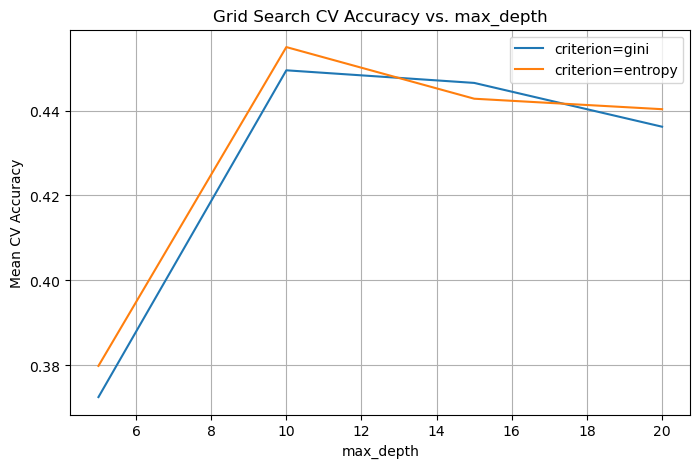

In [24]:
# 将搜索结果转为 DataFrame
results_df = pd.DataFrame(grid_search.cv_results_)

# 可视化：不同 max_depth 的准确率趋势
plt.figure(figsize=(8,5))
for criterion in param_grid['criterion']:
    subset = results_df[results_df['param_criterion'] == criterion]
    plt.plot(subset['param_max_depth'], subset['mean_test_score'], label=f'criterion={criterion}')

plt.xlabel('max_depth')
plt.ylabel('Mean CV Accuracy')
plt.title('Grid Search CV Accuracy vs. max_depth')
plt.legend()
plt.grid(True)
plt.show()

### Fully connected neural network

In [26]:
def build_model(hp):
    model = keras.models.Sequential([
        keras.layers.Input(shape=[28, 28, 3]),
        keras.layers.Flatten()
    ])

    for i in range(1, 3):
        model.add(keras.layers.Dense(
            units=hp.Choice(f"units_{i}", [100, 200]),
            activation=hp.Choice("activation", ["relu", "sigmoid", "tanh"])
        ))

    model.add(keras.layers.Dense(9, activation="softmax"))
    model.compile(optimizer=keras.optimizers.SGD(
        learning_rate=hp.Choice("learning_rate", [0.1, 0.01, 0.001])),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy'])
    return model

tuner = keras_tuner.RandomSearch(
    build_model,
    objective="val_accuracy",
    max_trials=36,
    executions_per_trial=1,
    directory="keras_tuning_results",
    project_name="assignment2_mlp"
)
tuner.search(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

Trial 36 Complete [00h 00m 10s]
val_accuracy: 0.14031249284744263

Best val_accuracy So Far: 0.5590624809265137
Total elapsed time: 17h 59m 36s


100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 274us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 276us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 290us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 277us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 278us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 280us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 281us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 282us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 0s 273us/step
100/100 ━━━

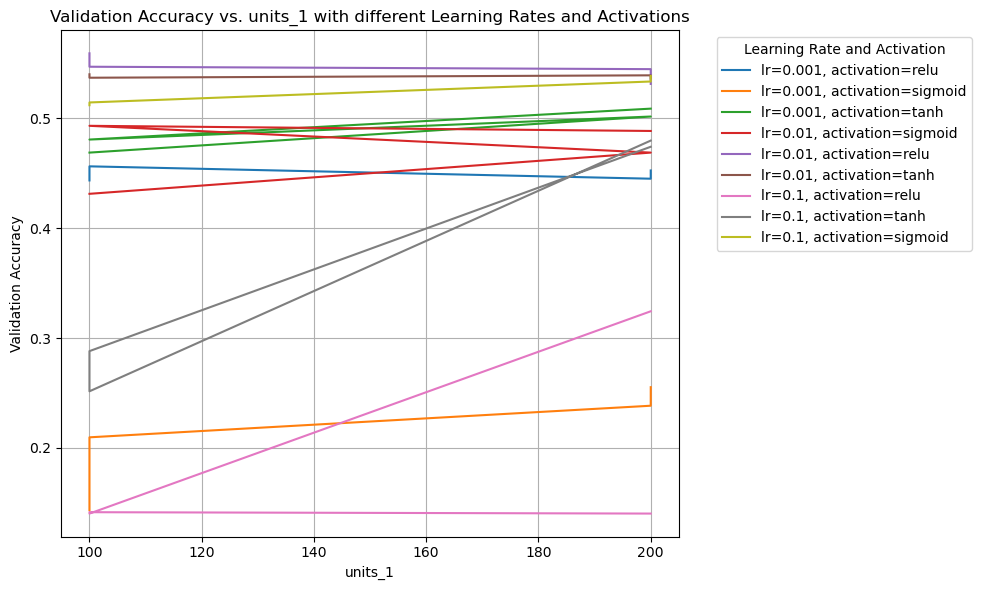

In [27]:
# Start tuning
start_time = time.time()
tuner.search(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

# End the tuning process and calculate the total time
total_training_time = time.time() - start_time

# Extract results for comparison
results = []

for trial in tuner.oracle.trials.values():
    hp = trial.hyperparameters.values
    acc = trial.score  # Validation accuracy
    model = tuner.get_best_models()[0]  # Get the best model after tuning

    # Predict on the validation set
    y_pred = model.predict(X_valid)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate the metrics
    cm = confusion_matrix(y_valid, y_pred_classes)
    accuracy = accuracy_score(y_valid, y_pred_classes)
    precision = precision_score(y_valid, y_pred_classes, average='weighted')
    recall = recall_score(y_valid, y_pred_classes, average='weighted')
    f1 = f1_score(y_valid, y_pred_classes, average='weighted')

    # Add the results to the list
    results.append({
        'units_1': hp['units_1'],
        'units_2': hp['units_2'],
        'activation': hp['activation'],
        'learning_rate': hp['learning_rate'],
        'val_accuracy': acc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'training_time': total_training_time / len(tuner.oracle.trials)  # Average time per trial
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Display the results table
print(results_df)

# Visualize the validation accuracy with respect to different hyperparameters
plt.figure(figsize=(10, 6))
for lr in results_df['learning_rate'].unique():
    subset = results_df[results_df['learning_rate'] == lr]
    for activation in subset['activation'].unique():
        data = subset[subset['activation'] == activation]
        plt.plot(data['units_1'], data['val_accuracy'], label=f'lr={lr}, activation={activation}')

plt.title('Validation Accuracy vs. units_1 with different Learning Rates and Activations')
plt.xlabel('units_1')
plt.ylabel('Validation Accuracy')
plt.legend(title='Learning Rate and Activation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sort results by learning_rate for better visualization
results_df_sorted = results_df.sort_values(by='learning_rate')

# Optionally, save the results as a CSV
# results_df_sorted.to_csv('hyperparameter_tuning_results.csv', index=False)

### Convolutional neural network

Trial 36 Complete [00h 03m 48s]
val_accuracy: 0.5284374952316284

Best val_accuracy So Far: 0.7540624737739563
Total elapsed time: 18h 36m 46s
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/s

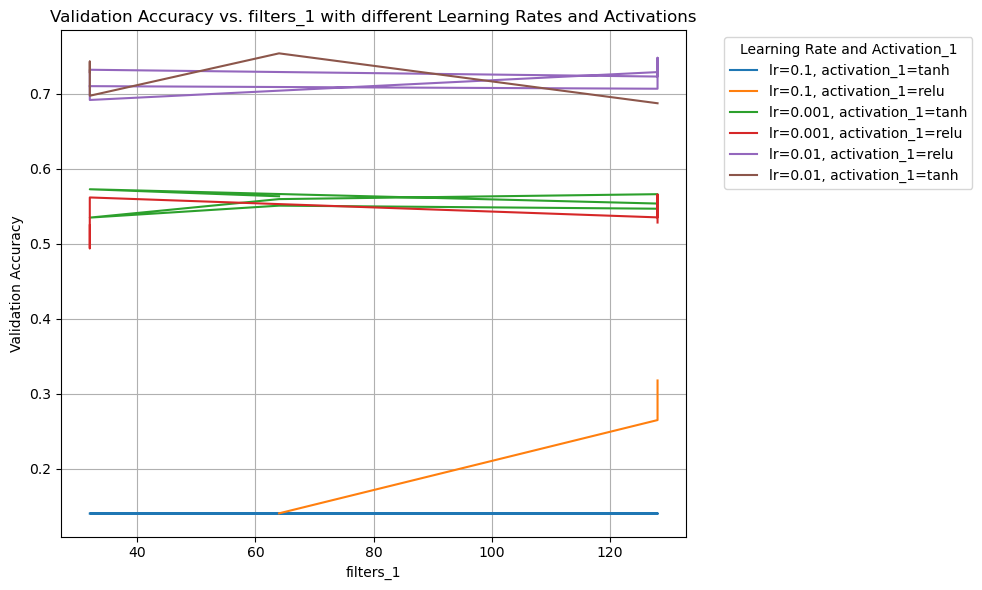

In [29]:
# Re-load fresh, unflattened image data for CNN tuning
X = np.load('Assignment2Data/X_train.npy') / 255.0
y = np.load('Assignment2Data/y_train.npy')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Confirm shape (should be 4D)
print("X_train shape:", X_train.shape)  # should be (num_samples, 28, 28, 3)

# CNN model building function
def build_model_cnn(hp):
    model = keras.models.Sequential([
        keras.layers.Input(shape=[28, 28, 3]),
        keras.layers.Conv2D(
            filters=hp.Choice("filters_1", [32, 64, 128]),
            kernel_size=hp.Choice("kernel_size_1", [3, 5]),
            activation=hp.Choice("activation_1", ["relu", "tanh"])
        ),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(
            filters=hp.Choice("filters_2", [64, 128, 256]),
            kernel_size=hp.Choice("kernel_size_2", [3, 5]),
            activation=hp.Choice("activation_2", ["relu", "tanh"])
        ),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dropout(hp.Float("dropout_rate", 0.3, 0.5, step=0.1)),
        keras.layers.Dense(9, activation="softmax")
    ])
    model.compile(
        optimizer=keras.optimizers.SGD(
            learning_rate=hp.Choice("learning_rate", [0.1, 0.01, 0.001])
        ),
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# Run tuner
tuner = keras_tuner.RandomSearch(
    build_model_cnn,
    objective="val_accuracy",
    max_trials=36,
    executions_per_trial=1,
    directory="keras_tuning_results",
    project_name="assignment2_cnn"
)

# Start timing the tuning process
start_time = time.time()
tuner.search(X_train, y_train, epochs=15, validation_data=(X_valid, y_valid))

# Calculate total training time
total_training_time = time.time() - start_time

# Extract results for comparison
results = []

for trial in tuner.oracle.trials.values():
    hp = trial.hyperparameters.values
    acc = trial.score  # Validation accuracy
    model = tuner.get_best_models()[0]  # Get the best model after tuning

    # Predict on the validation set
    y_pred = model.predict(X_valid)
    y_pred_classes = np.argmax(y_pred, axis=1)

    # Calculate metrics
    cm = confusion_matrix(y_valid, y_pred_classes)
    accuracy = accuracy_score(y_valid, y_pred_classes)
    precision = precision_score(y_valid, y_pred_classes, average='weighted')
    recall = recall_score(y_valid, y_pred_classes, average='weighted')
    f1 = f1_score(y_valid, y_pred_classes, average='weighted')

    # Store results
    results.append({
        'filters_1': hp['filters_1'],
        'kernel_size_1': hp['kernel_size_1'],
        'activation_1': hp['activation_1'],
        'filters_2': hp['filters_2'],
        'kernel_size_2': hp['kernel_size_2'],
        'activation_2': hp['activation_2'],
        'dropout_rate': hp['dropout_rate'],
        'learning_rate': hp['learning_rate'],
        'val_accuracy': acc,
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'confusion_matrix': cm,
        'training_time': total_training_time / len(tuner.oracle.trials)  # Average time per trial
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)

# Display the results
print(results_df)

# Visualize validation accuracy with respect to hyperparameters
plt.figure(figsize=(10, 6))
for lr in results_df['learning_rate'].unique():
    subset = results_df[results_df['learning_rate'] == lr]
    for activation in subset['activation_1'].unique():
        data = subset[subset['activation_1'] == activation]
        plt.plot(data['filters_1'], data['val_accuracy'], label=f'lr={lr}, activation_1={activation}')

plt.title('Validation Accuracy vs. filters_1 with different Learning Rates and Activations')
plt.xlabel('filters_1')
plt.ylabel('Validation Accuracy')
plt.legend(title='Learning Rate and Activation_1', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

# Sort results by learning_rate for better visualization
results_df_sorted = results_df.sort_values(by='learning_rate')

# Optionally save the results to a CSV
# results_df_sorted.to_csv('cnn_hyperparameter_tuning_results.csv', index=False)

In [30]:
# 提取每个 trial 的超参数和性能
results = []

for trial in tuner.oracle.trials.values():
    hp = trial.hyperparameters.values
    acc = trial.score  # 使用 trial.score 直接获取验证准确率
    results.append({
        'Filters 1': hp['filters_1'],
        'Kernel Size 1': hp['kernel_size_1'],
        'Activation 1': hp['activation_1'],
        'Filters 2': hp['filters_2'],
        'Kernel Size 2': hp['kernel_size_2'],
        'Activation 2': hp['activation_2'],
        'Dropout Rate': hp['dropout_rate'],
        'Learning Rate': hp['learning_rate'],
        'Validation Accuracy': acc
    })

# 转换为 DataFrame
results_df = pd.DataFrame(results)

# 查看前几行结果（可选）
print("Best Trials Hyperparameters and Validation Accuracy")
print(results_df)

# 样式化表格：突出显示验证准确率最好的几行
styled_df = results_df.style.highlight_max(subset='Validation Accuracy', color='lightgreen', axis=0)

# 显示样式化后的表格
styled_df

Best Trials Hyperparameters and Validation Accuracy
    Filters 1  Kernel Size 1 Activation 1  Filters 2  Kernel Size 2  \
0         128              5         tanh        256              3   
1          64              3         tanh        128              5   
2          32              3         tanh        256              3   
3          32              5         tanh        256              3   
4          32              5         relu         64              5   
5          32              5         relu         64              3   
6         128              5         tanh        128              5   
7         128              5         tanh         64              5   
8          64              3         tanh        128              3   
9         128              5         tanh         64              5   
10        128              3         relu        256              5   
11         32              5         tanh        128              3   
12        128            

,Filters 1,Kernel Size 1,Activation 1,Filters 2,Kernel Size 2,Activation 2,Dropout Rate,Learning Rate,Validation Accuracy
0,128,5,tanh,256,3,tanh,0.300000,0.100000,0.140312
1,64,3,tanh,128,5,tanh,0.300000,0.001000,0.563438
2,32,3,tanh,256,3,relu,0.300000,0.100000,0.140625
3,32,5,tanh,256,3,relu,0.400000,0.001000,0.572812
4,32,5,relu,64,5,tanh,0.400000,0.001000,0.524688
5,32,5,relu,64,3,relu,0.300000,0.010000,0.710312
6,128,5,tanh,128,5,tanh,0.300000,0.001000,0.553750
7,128,5,tanh,64,5,relu,0.300000,0.001000,0.566250
8,64,3,tanh,128,3,relu,0.400000,0.001000,0.559687
9,128,5,tanh,64,5,tanh,0.300000,0.100000,0.140312


## 4. Final models
In this section, please ensure to include cells to train each model with its best hyperparmater combination independently of the hyperparameter tuning cells, i.e. don't rely on the hyperparameter tuning cells having been run.

### Algorithm of choice from first six weeks of course

In [33]:
# Flatten the image data
X_flat = X.reshape(X.shape[0], -1)

# Train-test split on flattened data
X_train, X_test, y_train, y_test = train_test_split(
    X_flat, y, test_size=0.25, stratify=y, random_state=42
)

# Use the best hyperparameters from grid search
best_depth = grid_search.best_params_['max_depth']
best_criterion = grid_search.best_params_['criterion']

# Train the final Decision Tree model
final_dt = DecisionTreeClassifier(max_depth=best_depth, criterion=best_criterion, random_state=42)

# Start training time measurement
start_time = time.time()
final_dt.fit(X_train, y_train)

# End training time measurement
training_time = time.time() - start_time

# Predict on the test set
y_pred = final_dt.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')
cm = confusion_matrix(y_test, y_pred)

# Create results dictionary
results = {
    'max_depth': best_depth,
    'criterion': best_criterion,
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'training_time': training_time
}

# Convert results to DataFrame
results_df = pd.DataFrame([results])

# Display the results
print(results_df)

# Optionally save the results to a CSV
# results_df.to_csv('decision_tree_results.csv', index=False)

# Print detailed evaluation metrics
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


   max_depth criterion  accuracy  precision    recall  f1_score  \
0         10   entropy  0.462625   0.459779  0.462625  0.455008   

                                    confusion_matrix  training_time  
0  [[698, 34, 7, 1, 84, 19, 11, 9, 10], [46, 720,...      20.112729  

Confusion Matrix:
[[698  34   7   1  84  19  11   9  10]
 [ 46 720   4  30  24   4   2  14  14]
 [ 12   7 221  55  49 168  29 154 181]
 [  8  12  14 477  84   9  43  40 227]
 [ 62  23  17  93 294  38  29  93  88]
 [ 25   8 171  25  73 396  21 240 114]
 [ 25   5  26 127 138  31  59  78 193]
 [  3   3  90  45  99 132  18 303 120]
 [ 16  10  61 243  77  78  60  96 533]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       873
           1       0.88      0.84      0.86       858
           2       0.36      0.25      0.30       876
           3       0.44      0.52      0.47       914
           4       0.32      0.40      0.35       737
     

### Fully connected neural network

Epoch 1/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.1709 - loss: 2.1424 - val_accuracy: 0.2688 - val_loss: 1.8438
Epoch 2/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.2981 - loss: 1.7722 - val_accuracy: 0.3328 - val_loss: 1.6975
Epoch 3/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3662 - loss: 1.6797 - val_accuracy: 0.3853 - val_loss: 1.6198
Epoch 4/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.3851 - loss: 1.6421 - val_accuracy: 0.4219 - val_loss: 1.5442
Epoch 5/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4104 - loss: 1.5686 - val_accuracy: 0.4547 - val_loss: 1.4895
Epoch 6/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4332 - loss: 1.5067 - val_accuracy: 0.4663 - val_loss: 1.4220
Epoch 7/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.4610 - loss: 1.4559 - val_accuracy: 0.4531 - val_loss: 1.4483
Epoch 8/128
750/750 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4652 - loss: 1.4362 - val_accu

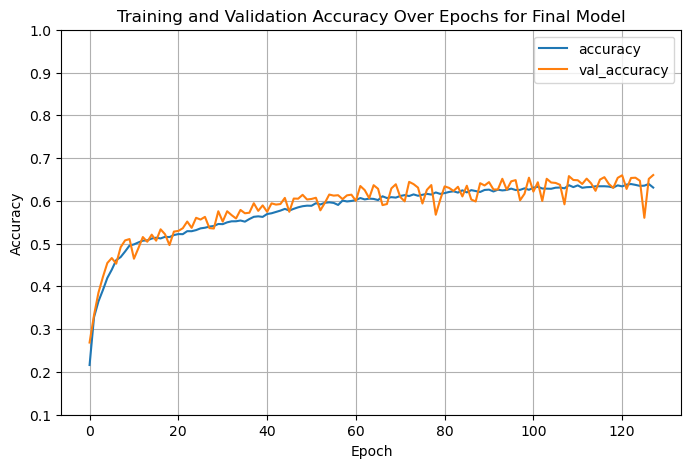


Best Epoch: 128
Best Validation Accuracy: 0.6603


In [35]:
# 确保数据被扁平化处理
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_valid_flat = X_valid.reshape(X_valid.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# 获取最佳超参数
best_hps = tuner.get_best_hyperparameters(1)[0]

# 使用最佳超参数构建最终模型
def build_final_model(hp):
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=(2352,)))  # 扁平化输入
    model.add(keras.layers.Dense(hp.Int('units1', 64, 256, step=64), activation='relu'))
    model.add(keras.layers.Dense(hp.Int('units2', 32, 128, step=32), activation='relu'))
    model.add(keras.layers.Dense(9, activation='softmax'))  # 输出 9 类

    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# 根据最佳超参数重新训练最终模型
model_nn = build_final_model(best_hps)

# 开始训练时间计时
start_time = time.time()

# 训练模型
history = model_nn.fit(X_train_flat, y_train, epochs=128, validation_data=(X_valid_flat, y_valid))

# 结束训练时间计时
training_time = time.time() - start_time

# 评估最终模型
loss, accuracy = model_nn.evaluate(X_test_flat, y_test)
print(f"Final Model Test Accuracy: {accuracy:.4f}")

# 预测测试集
y_pred = model_nn.predict(X_test_flat)
y_pred_classes = np.argmax(y_pred, axis=1)

# 计算评估指标
precision = precision_score(y_test, y_pred_classes, average='weighted')
recall = recall_score(y_test, y_pred_classes, average='weighted')
f1 = f1_score(y_test, y_pred_classes, average='weighted')
cm = confusion_matrix(y_test, y_pred_classes)

# 输出评估指标
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_test, y_pred_classes))

# 创建结果字典
results = {
    'units1': best_hps['units1'],
    'units2': best_hps['units2'],
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'training_time': training_time
}

# 转换为 DataFrame 并显示
results_df = pd.DataFrame([results])
print("\nModel Evaluation Results:")
print(results_df)

# 绘制训练和验证准确率曲线
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.1, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for Final Model')
plt.show()

# 输出最佳验证准确率和对应的 epoch
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"\nBest Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")


### Convolutional neural network

Epoch 1/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.2101 - loss: 2.0707 - val_accuracy: 0.4166 - val_loss: 1.6132
Epoch 2/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.4015 - loss: 1.6072 - val_accuracy: 0.4963 - val_loss: 1.3539
Epoch 3/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.4706 - loss: 1.4208 - val_accuracy: 0.5953 - val_loss: 1.1506
Epoch 4/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5091 - loss: 1.3055 - val_accuracy: 0.5991 - val_loss: 1.1234
Epoch 5/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.5510 - loss: 1.2046 - val_accuracy: 0.6497 - val_loss: 1.0078
Epoch 6/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - accuracy: 0.5887 - loss: 1.1126 - val_accuracy: 0.6106 - val_loss: 1.1028
Epoch 7/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 18s 20ms/step - accuracy: 0.6126 - loss: 1.0560 - val_accuracy: 0.6844 - val_loss: 0.9120
Epoch 8/128
900/900 ━━━━━━━━━━━━━━━━━━━━ 17s 19ms/step - accuracy: 0.6287 - loss: 1

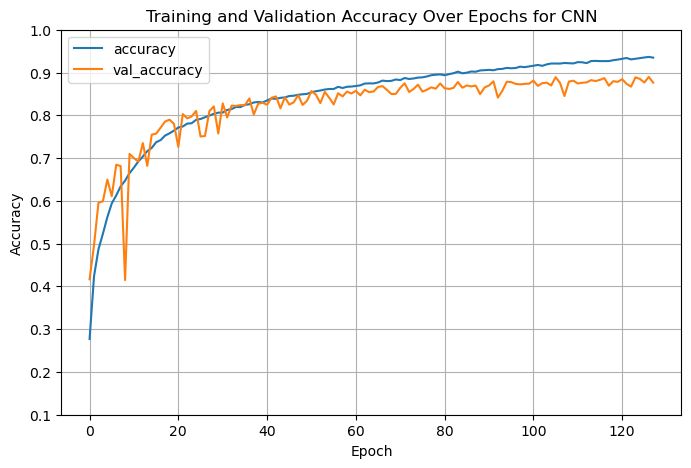

Best Epoch: 127
Best Validation Accuracy: 0.8897
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.8784 - loss: 0.3469
CNN Model Test Accuracy: 0.8763
100/100 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Confusion Matrix:
[[365   1   0   0   8   1   1   2   0]
 [  3 351   0   0   6   0   0   0   0]
 [  0   0 267   0   4  11   2  27  17]
 [  0   0   3 339   0   0   6   0   7]
 [  3   6   2   0 286   5  10   6   2]
 [  5   0  17   1   5 343   1  58   4]
 [  1   0   5   2  12   0 211   2  22]
 [  0   0  35   0   8  24   1 249   4]
 [  1   0  16   3   9   0  13  14 393]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       378
           1       0.98      0.97      0.98       360
           2       0.77      0.81      0.79       328
           3       0.98      0.95      0.97       355
           4       0.85      0.89      0.87       320
           5       0.89      0.79      0.84       434
           6       0.86      

In [37]:
# Load and preprocess data (no flattening for CNN, retain original shape: (N, 28, 28, 3))
X_full = np.load('Assignment2Data/X_train.npy') / 255.0
y_full = np.load('Assignment2Data/y_train.npy')

# Split the data into training and validation sets
X_train, X_valid, y_train, y_valid = train_test_split(X_full, y_full, train_size=0.9, random_state=42)

# Get the best hyperparameters from the tuner
best_hps = tuner.get_best_hyperparameters(1)[0]

# Build the CNN model using the best hyperparameters
model_cnn = build_model_cnn(best_hps)

# Start training time measurement
start_time = time.time()

# Train the model
history = model_cnn.fit(X_train, y_train, epochs=128, validation_data=(X_valid, y_valid))

# End training time measurement
training_time = time.time() - start_time

# Plot training and validation accuracy
accuracies = pd.DataFrame(history.history)[['accuracy', 'val_accuracy']]
accuracies.plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0.1, 1)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Over Epochs for CNN')
plt.show()

# Output the best validation accuracy and corresponding epoch
best_epoch = history.history['val_accuracy'].index(max(history.history['val_accuracy'])) + 1
best_val_acc = max(history.history['val_accuracy'])
print(f"Best Epoch: {best_epoch}")
print(f"Best Validation Accuracy: {best_val_acc:.4f}")

# Evaluate the model on the validation set
loss, accuracy = model_cnn.evaluate(X_valid, y_valid)
print(f"CNN Model Test Accuracy: {accuracy:.4f}")

# Predict on the validation set
y_pred = model_cnn.predict(X_valid)
y_pred_classes = np.argmax(y_pred, axis=1)

# Calculate evaluation metrics
precision = precision_score(y_valid, y_pred_classes, average='weighted')
recall = recall_score(y_valid, y_pred_classes, average='weighted')
f1 = f1_score(y_valid, y_pred_classes, average='weighted')
cm = confusion_matrix(y_valid, y_pred_classes)

# Output evaluation metrics
print("\nConfusion Matrix:")
print(cm)

print("\nClassification Report:")
print(classification_report(y_valid, y_pred_classes))

# Create results dictionary
results = {
    'units1': best_hps['units1'],
    'units2': best_hps['units2'],
    'accuracy': accuracy,
    'precision': precision,
    'recall': recall,
    'f1_score': f1,
    'confusion_matrix': cm,
    'training_time': training_time
}

# Convert to DataFrame and display the results
results_df = pd.DataFrame([results])
print("\nModel Evaluation Results:")
print(results_df)
